In [341]:
import pandas as pd 
import numpy as np 
import pathlib as path
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import sample
import statsmodels.api as sm
import os
from scipy.stats import binomtest

In [342]:
#define the relevant path to the current batch you wish to parse
project_name='multicategory_working_memory'
experiment_name='experiment 1'
qualification_method='loose' #or 'loose' or #'none' (will take the entire sample of participants that we have values for)

add_similarity_values=False #this adds the similarity of each image pair in the actuall experiment it takes some time (15 minutes)

model_name='VGG' #the only model we work with atm so dont change
PATH_TO_BATCH=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'collected data' 
PATH_TO_PROJECT=path.Path.cwd().parent.parent.parent / 'projects' / project_name 
PATH_TO_EXPERIMENT=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name
PATH_TO_OUTPUTS=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'figures and outputs' 
if PATH_TO_BATCH.exists():
    print('batch folder found at:\n' ,PATH_TO_BATCH)
else: 
    print('path to batch is non existent:\n',PATH_TO_BATCH)

batch folder found at:
 /Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data


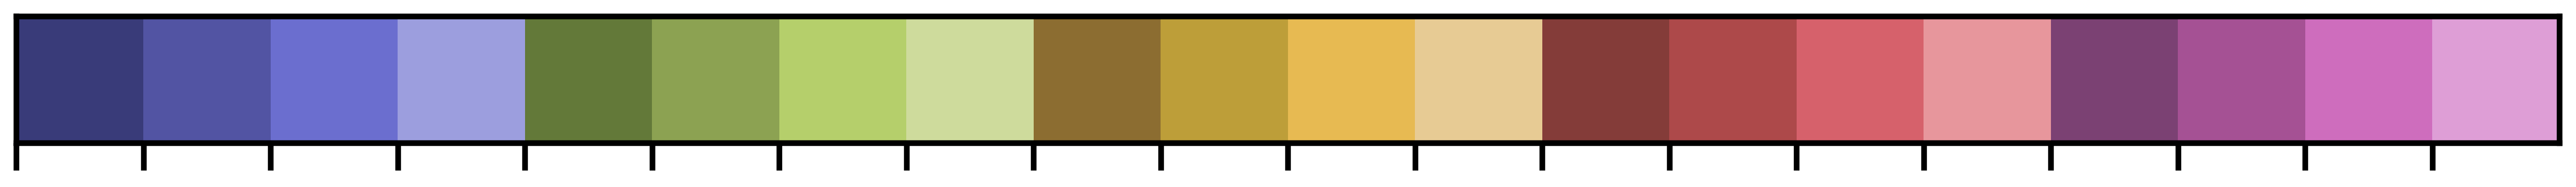

In [343]:
params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 36,
    'axes.labelsize': 40,
    'axes.titlesize': 40,
    'xtick.labelsize': 36,
    'ytick.labelsize': 36,
    'legend.fontsize': 40,
    'lines.linewidth': 4,
    'figure.figsize': (30, 30),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'svg',
    'savefig.bbox': 'tight'
}
plt.rcParams.update(params)

# Set Seaborn parameters
sns.set_context("poster", font_scale=1.0)
sns.set_palette('tab20b')

# Plot the color palette
sns.palplot(sns.color_palette())

# Choose a color from the palette
my_color = sns.color_palette()[2]

# Show the plot
plt.show()

In [344]:
all_directories_paths_working_memory = [x[0] for x in os.walk(PATH_TO_BATCH) if ('batch' in x[0].split('\\')[-1]) and ('data'  not in x[0].split('/')[-1])]

#delete the following rows once batch 2 is actually filled with data and processed. 
all_directories_paths_working_memory

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 4',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 2']

In [345]:

if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_working_memory = pd.DataFrame([])
for batch in all_directories_paths_working_memory:
    time_gap = 'working_memory'
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_working_memory = pd.concat([all_valid_subjects_working_memory,file])

In [346]:
print(f'there are {len(all_valid_subjects_working_memory.index) - len(set(all_valid_subjects_working_memory.index))}, duplicate subjects')

there are 0, duplicate subjects


In [347]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets]
  # Connect each pair of points from the same row with a line
  for bar_ind in np.arange(0,len(x_offsets_arrays)-1):
    for i in range(len(x_offsets_arrays[0])):
      ax.plot([x_offsets_arrays[bar_ind][i], x_offsets_arrays[bar_ind+1][i]], [y_offsets_arrays[bar_ind][i], y_offsets_arrays[bar_ind+1][i]], color="gray", alpha=0.75)

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


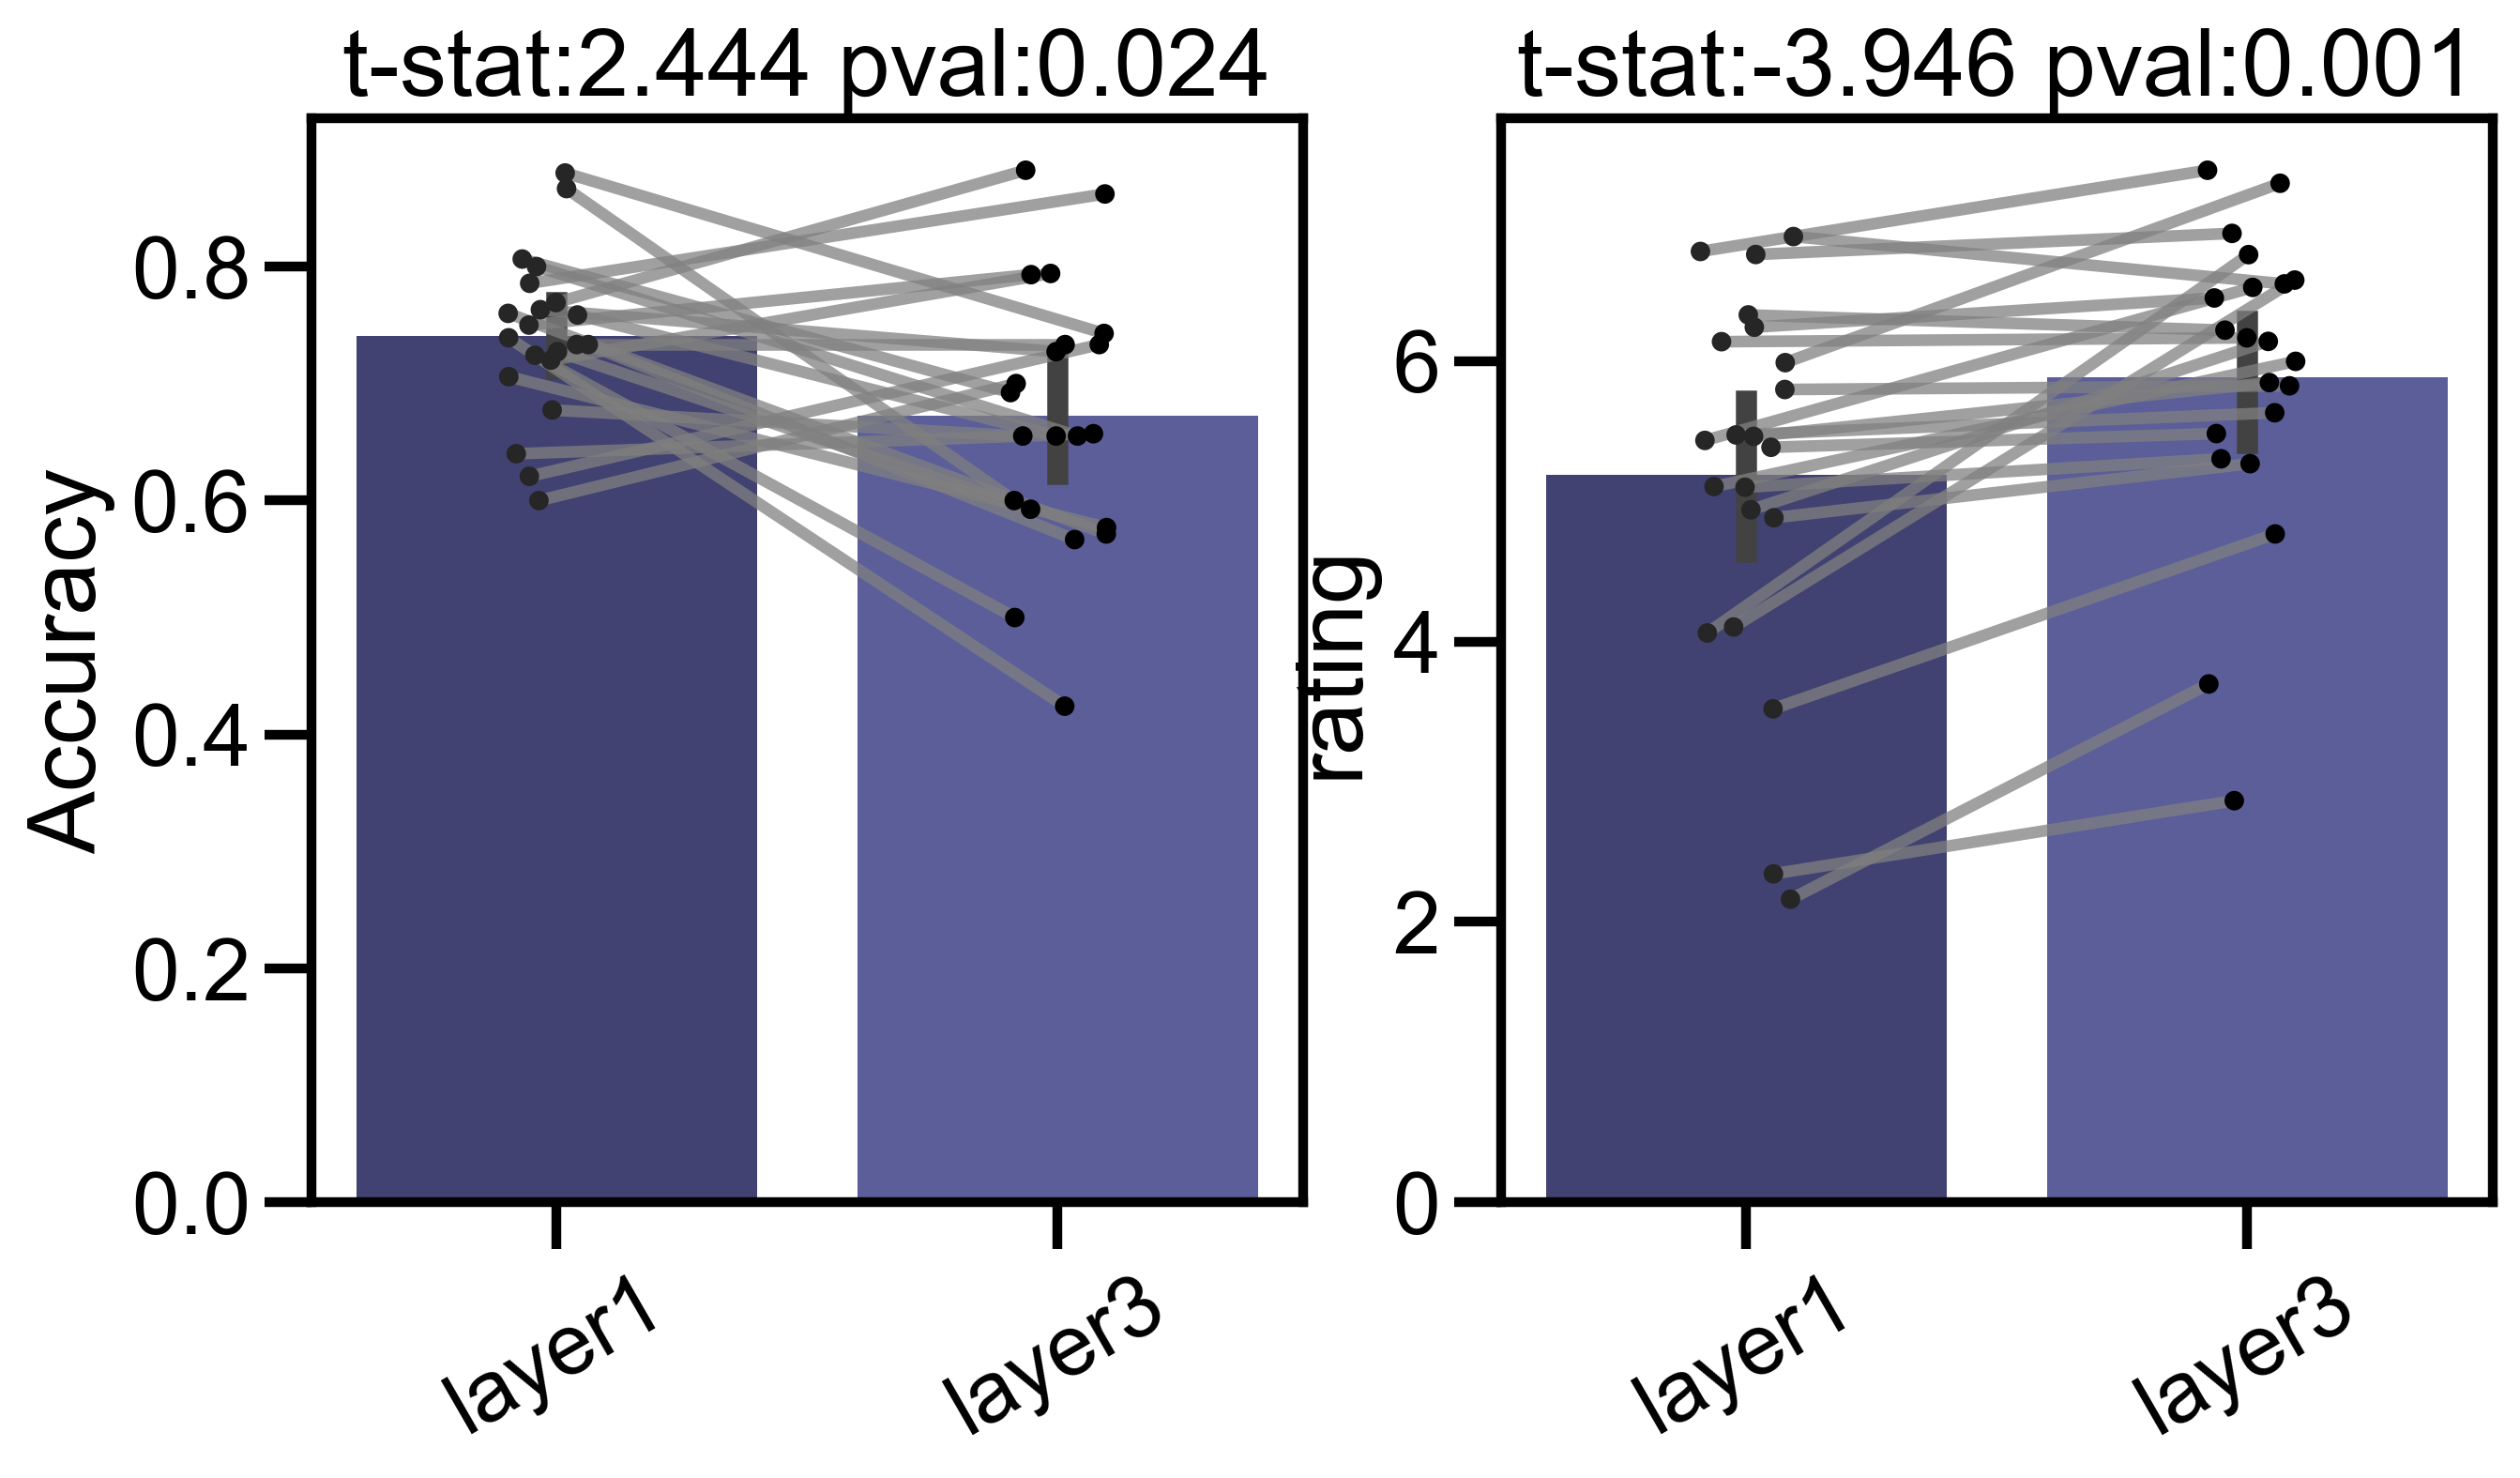

In [348]:
import scipy.stats as stats
import seaborn as sns


d1 = all_valid_subjects_working_memory['level_1_accuracy']
d2 = all_valid_subjects_working_memory['level_3_accuracy']
t_stat, p_value = stats.ttest_rel(d1, d2)


fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0])
handel1 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')
axes[0].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')

sns.barplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],ax = axes[1])
handel2 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],color='k',ax = axes[1])


d1 = all_valid_subjects_working_memory['level_1_rating']
d2 = all_valid_subjects_working_memory['level_3_rating']
t_stat, p_value = stats.ttest_rel(d1, d2)

axes[1].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[1].set_ylabel('rating')
axes[1].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')


add_connecting_lines_to_stripplot(handel1,axes[0])
add_connecting_lines_to_stripplot(handel2,axes[1])

In [349]:
all_valid_subjects_working_memory['worker_ID'] = all_valid_subjects_working_memory.index
rt_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_rt','level_3_rt'],var_name='layer')
accuracy_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_accuracy','level_3_accuracy'],var_name='layer')

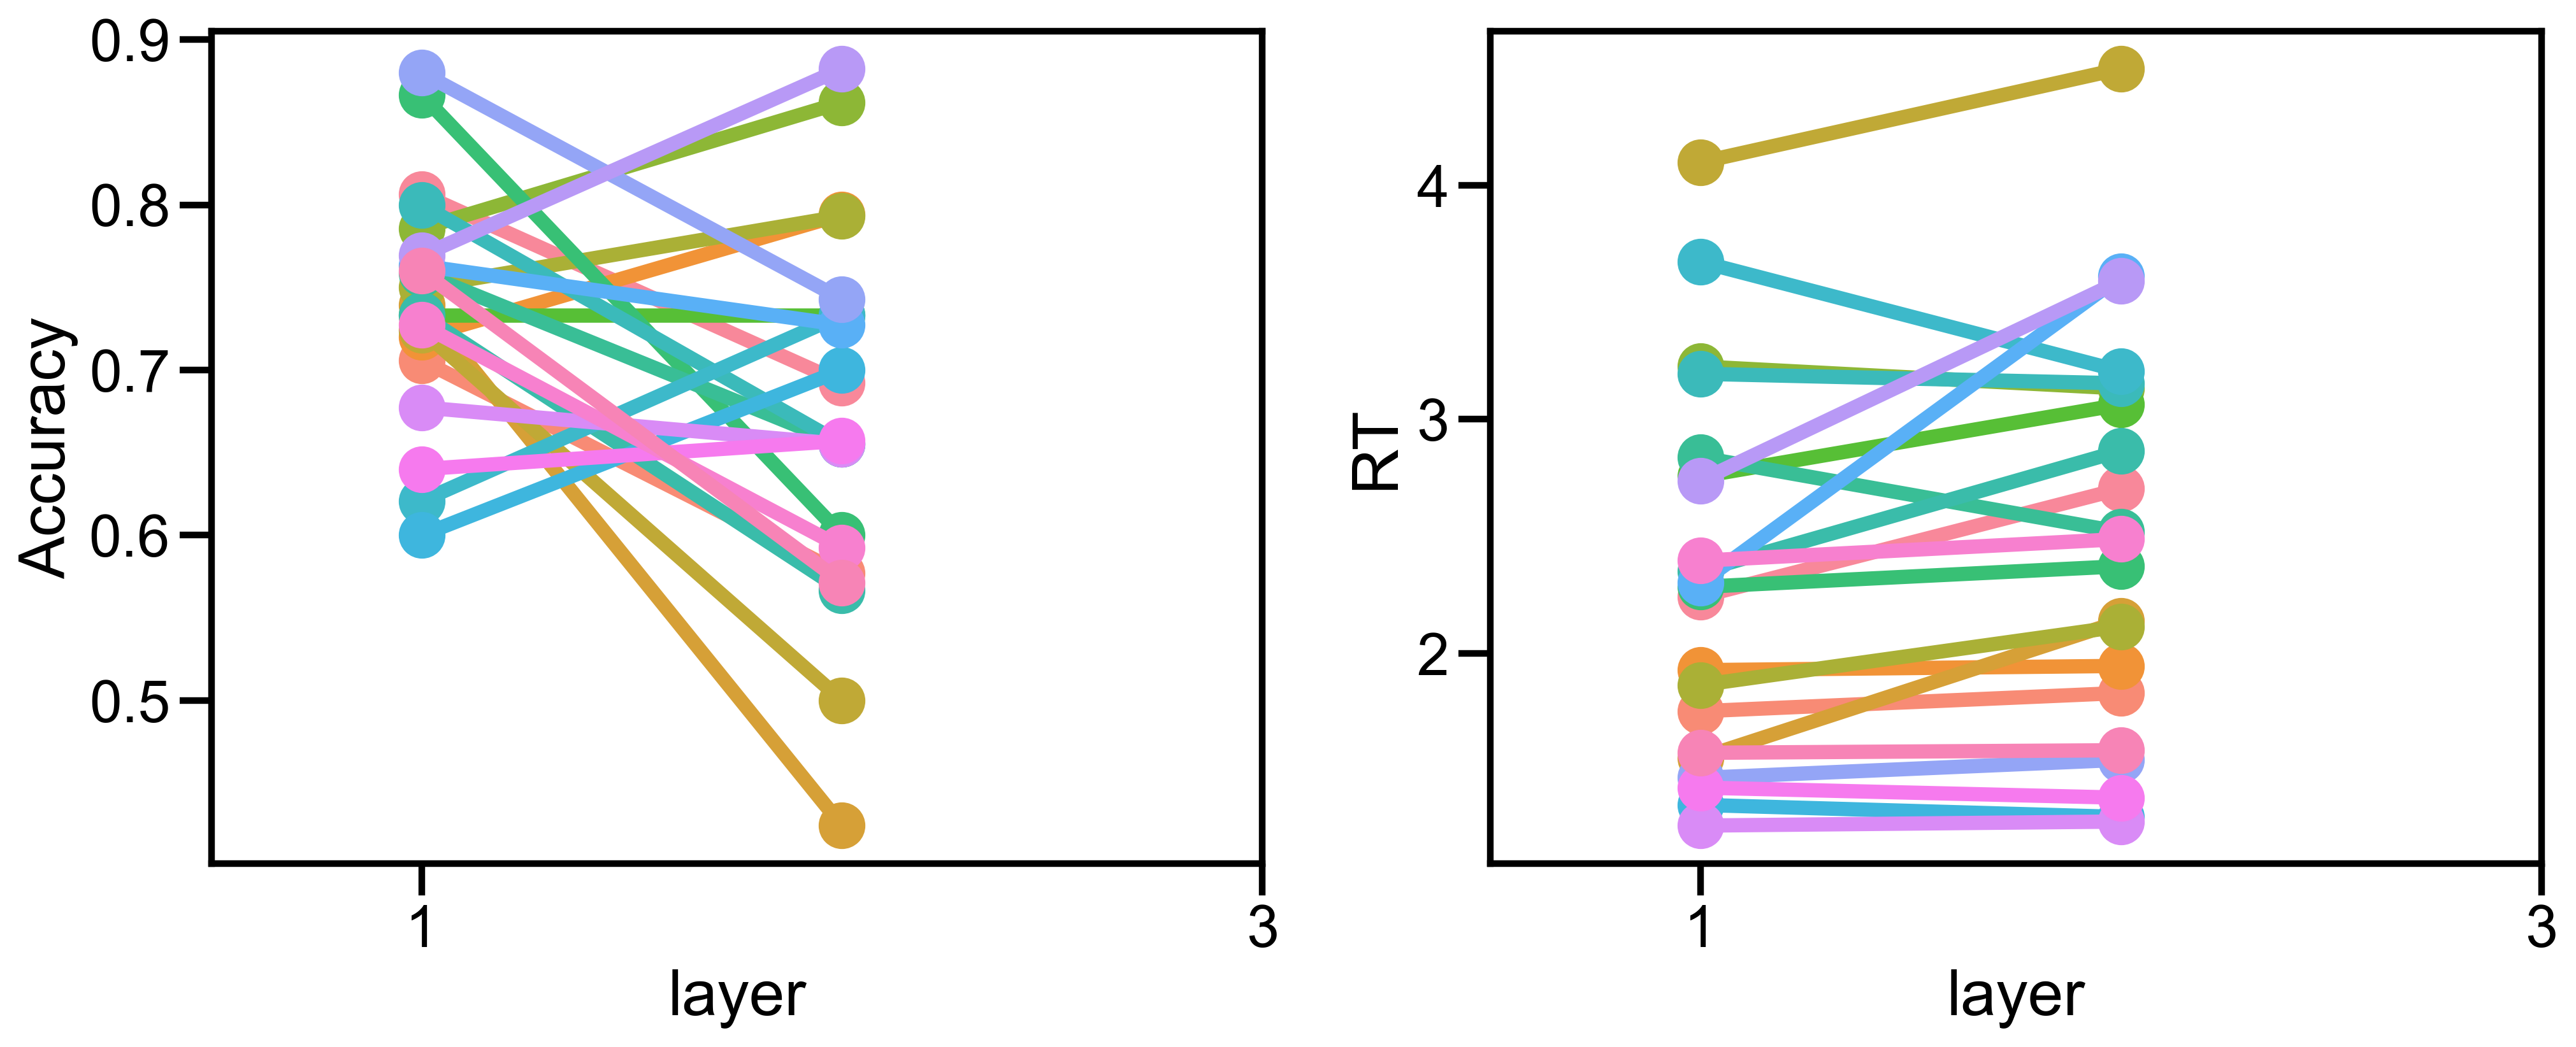

In [350]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6),sharex=True,sharey=False)
#accuracy: 
G = sns.pointplot(data=accuracy_df,x='layer', y='value', hue='worker_ID', ax=axes[0])
plt.xticks([0,2],['1','3'])
axes[0].set_ylabel('Accuracy')
axes[0].get_legend().remove() 

#rt: 
sns.pointplot(data=rt_df,x='layer', y='value', hue='worker_ID', ax=axes[1])
plt.xticks([0,2],['1','3'])
plt.ylabel('RT')
axes[1].get_legend().remove() 
plt.tight_layout()

## concatanate the working memory data with the same day and 24 hours data

In [351]:
PATH_TO_NON_WORKING_MEMORY_TIME_GAPS =path.Path.cwd().parent.parent.parent / 'projects' / 'multicategory' / 'experiment 1' 

all_directories_paths_long_term_memory = [x[0] for x in os.walk(PATH_TO_NON_WORKING_MEMORY_TIME_GAPS) if ('batch' in x[0].split('\\')[-1]) and ('data'  not in x[0].split('/')[-1])]
all_directories_paths_long_term_memory


['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2']

In [352]:
if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_non_working_memory = pd.DataFrame([])
for batch in all_directories_paths_long_term_memory:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_non_working_memory = pd.concat([all_valid_subjects_non_working_memory,file])

In [353]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    42
Name: count, dtype: int64

## remove duplicate subjects 

In [354]:
print(f'there are {len(all_valid_subjects_non_working_memory.index) - len(set(all_valid_subjects_non_working_memory.index))}, duplicate subjects')

there are 2, duplicate subjects


In [355]:
all_valid_subjects_non_working_memory.index.value_counts()

AEK2SAEL9GG39     2
A39KMTFHRJJASK    2
A2UWEAIX8UZXAQ    1
AW07POT8ABE05     1
AC01SVLHOB6HN     1
                 ..
A394S7JSNUA3TS    1
AZNIEFUIVB2H0     1
A1VXAJIELTYK0     1
A3CGQOJC28OVGN    1
A2J9NFY45NKR2N    1
Name: count, Length: 84, dtype: int64

In [356]:
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'AEK2SAEL9GG39') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'A39KMTFHRJJASK') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]

In [357]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
Name: count, dtype: int64

## concatanate data from working memroy and previous time gaps 

In [358]:
long_term_memory_cols = {'testing_layer_1_accuracy':'level_1_accuracy',
                         'testing_layer_1_rt':'level_1_rt',
                         'testing_layer_1_rating':'level_1_rating', 

                         'testing_layer_3_accuracy':'level_3_accuracy',
                         'testing_layer_3_rt':'level_3_rt',
                         'testing_layer_3_rating':'level_3_rating', 

                         'testing_longest_response_strike':'longest_response_strike',
                         'testing_rating_mean':'rating_mean',
                         'testing_rating_varience': 'rating_varience',
                         'testing_RT_overall_mean': 'RT_overall_mean',
                         'testing_Test_overall_accuracy':'Test_overall_accuracy'


                         }

all_valid_subjects_non_working_memory.rename(columns=long_term_memory_cols,inplace=True)
all_valid_subjects_non_working_memory

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_rating_varience,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,Test_overall_accuracy,...,testing_RT_incorrect_mean,testing_RT_correct_mean,level_1_rt,level_1_accuracy,level_3_rt,level_3_accuracy,longest_response_strike,time_gap,worker_ID,batch_number
A17K1CHOI773VZ,1.3138,1.0,0.666667,3.189917,1.834848,2.376300,3.596725,1.34020,1.0,0.733333,...,7.745687,4.504452,4.506480,0.833333,6.231083,0.633333,4.0,pilot_same_day,A17K1CHOI773VZ,1
AMHUDJ44HF1ZH,0.7300,1.0,0.500000,2.712833,4.381780,2.982133,2.443533,0.69402,1.0,0.816667,...,2.643782,2.385896,2.360230,0.733333,2.506120,0.900000,4.0,pilot_same_day,AMHUDJ44HF1ZH,1
AGOBQY50VQ7VX,1.1111,1.0,0.500000,3.341400,0.516398,1.598633,5.084167,1.04190,1.0,0.816667,...,2.623264,2.140065,2.084323,0.833333,2.372980,0.800000,6.0,pilot_same_day,AGOBQY50VQ7VX,1
A23J0G72AUTS1I,1.3290,1.0,0.333333,12.004650,2.338090,16.544175,2.925600,1.05904,1.0,0.783333,...,2.319831,3.026964,2.111473,0.900000,3.636030,0.666667,3.0,pilot_same_day,A23J0G72AUTS1I,1
ATPW1MWLW7RBL,1.0961,1.0,1.000000,2.207467,1.471960,NaN,2.207467,1.20210,1.0,0.800000,...,1.952917,1.803310,1.759800,0.833333,1.906663,0.766667,9.0,pilot_same_day,ATPW1MWLW7RBL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2F48NO7AD9VKK,0.6011,1.0,0.333333,3.500517,0.408248,4.163150,2.175250,0.54320,1.0,0.716667,...,3.469447,3.404072,3.646127,0.633333,3.199063,0.800000,5.0,pilot_24_hours,A2F48NO7AD9VKK,2
A19AYB3M3IIP51,1.7267,1.0,0.500000,3.909700,1.211060,4.775133,3.044267,2.05958,1.0,0.716667,...,5.714918,4.331965,3.696518,0.733333,3.097821,0.700000,4.0,pilot_24_hours,A19AYB3M3IIP51,2
A1BQLX0A4W8A8,0.9829,1.0,0.500000,6.063083,0.983192,7.433300,4.692867,0.89338,1.0,0.600000,...,3.688963,2.290708,1.585567,0.666667,2.210618,0.533333,4.0,pilot_24_hours,A1BQLX0A4W8A8,2
A1ABRVTR49OA73,1.5819,1.0,0.333333,4.368667,0.547723,4.043525,5.018950,0.99810,0.8,0.633333,...,1.293800,3.381529,1.300333,0.733333,1.434638,0.533333,3.0,pilot_24_hours,A1ABRVTR49OA73,2


In [359]:
all_subjects_working_memory_and_time_gaps = pd.concat([all_valid_subjects_non_working_memory,all_valid_subjects_working_memory])

In [360]:
renameing_dict = {'level_1_rating':'low_level_rating',
            'level_3_rating':'high_level_rating',
            'level_1_accuracy':'low_level_accuracy',
            'level_3_accuracy':'high_level_accuracy',
            'level_1_rt':'low_level_rt',
            'level_3_rt':'high_level_rt',
            'testing_RT_correct_mean':'RT_correct_mean',
            'testing_RT_incorrect_mean':'RT_incorrect_mean',
            'Test_overall_accuracy' : 'overall_accuracy'
}
all_subjects_working_memory_and_time_gaps.rename(columns=renameing_dict,inplace=True)

In [361]:
n_24_hours= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_same_day']
n_working_memory= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['working_memory']


all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
working_memory    21
Name: count, dtype: int64

In [362]:
all_subjects_working_memory_and_time_gaps.to_csv(PATH_TO_EXPERIMENT / ('all_data_working_memory_and_long_term_'+qualification_method+' .csv'),index=False,)

In [363]:
#create long format dataframes for accuracy and rt seperately
rt_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rt','high_level_rt'],var_name='layer')
accuracy_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_accuracy','high_level_accuracy'],var_name='layer')
rating_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rating','high_level_rating'],var_name='layer')

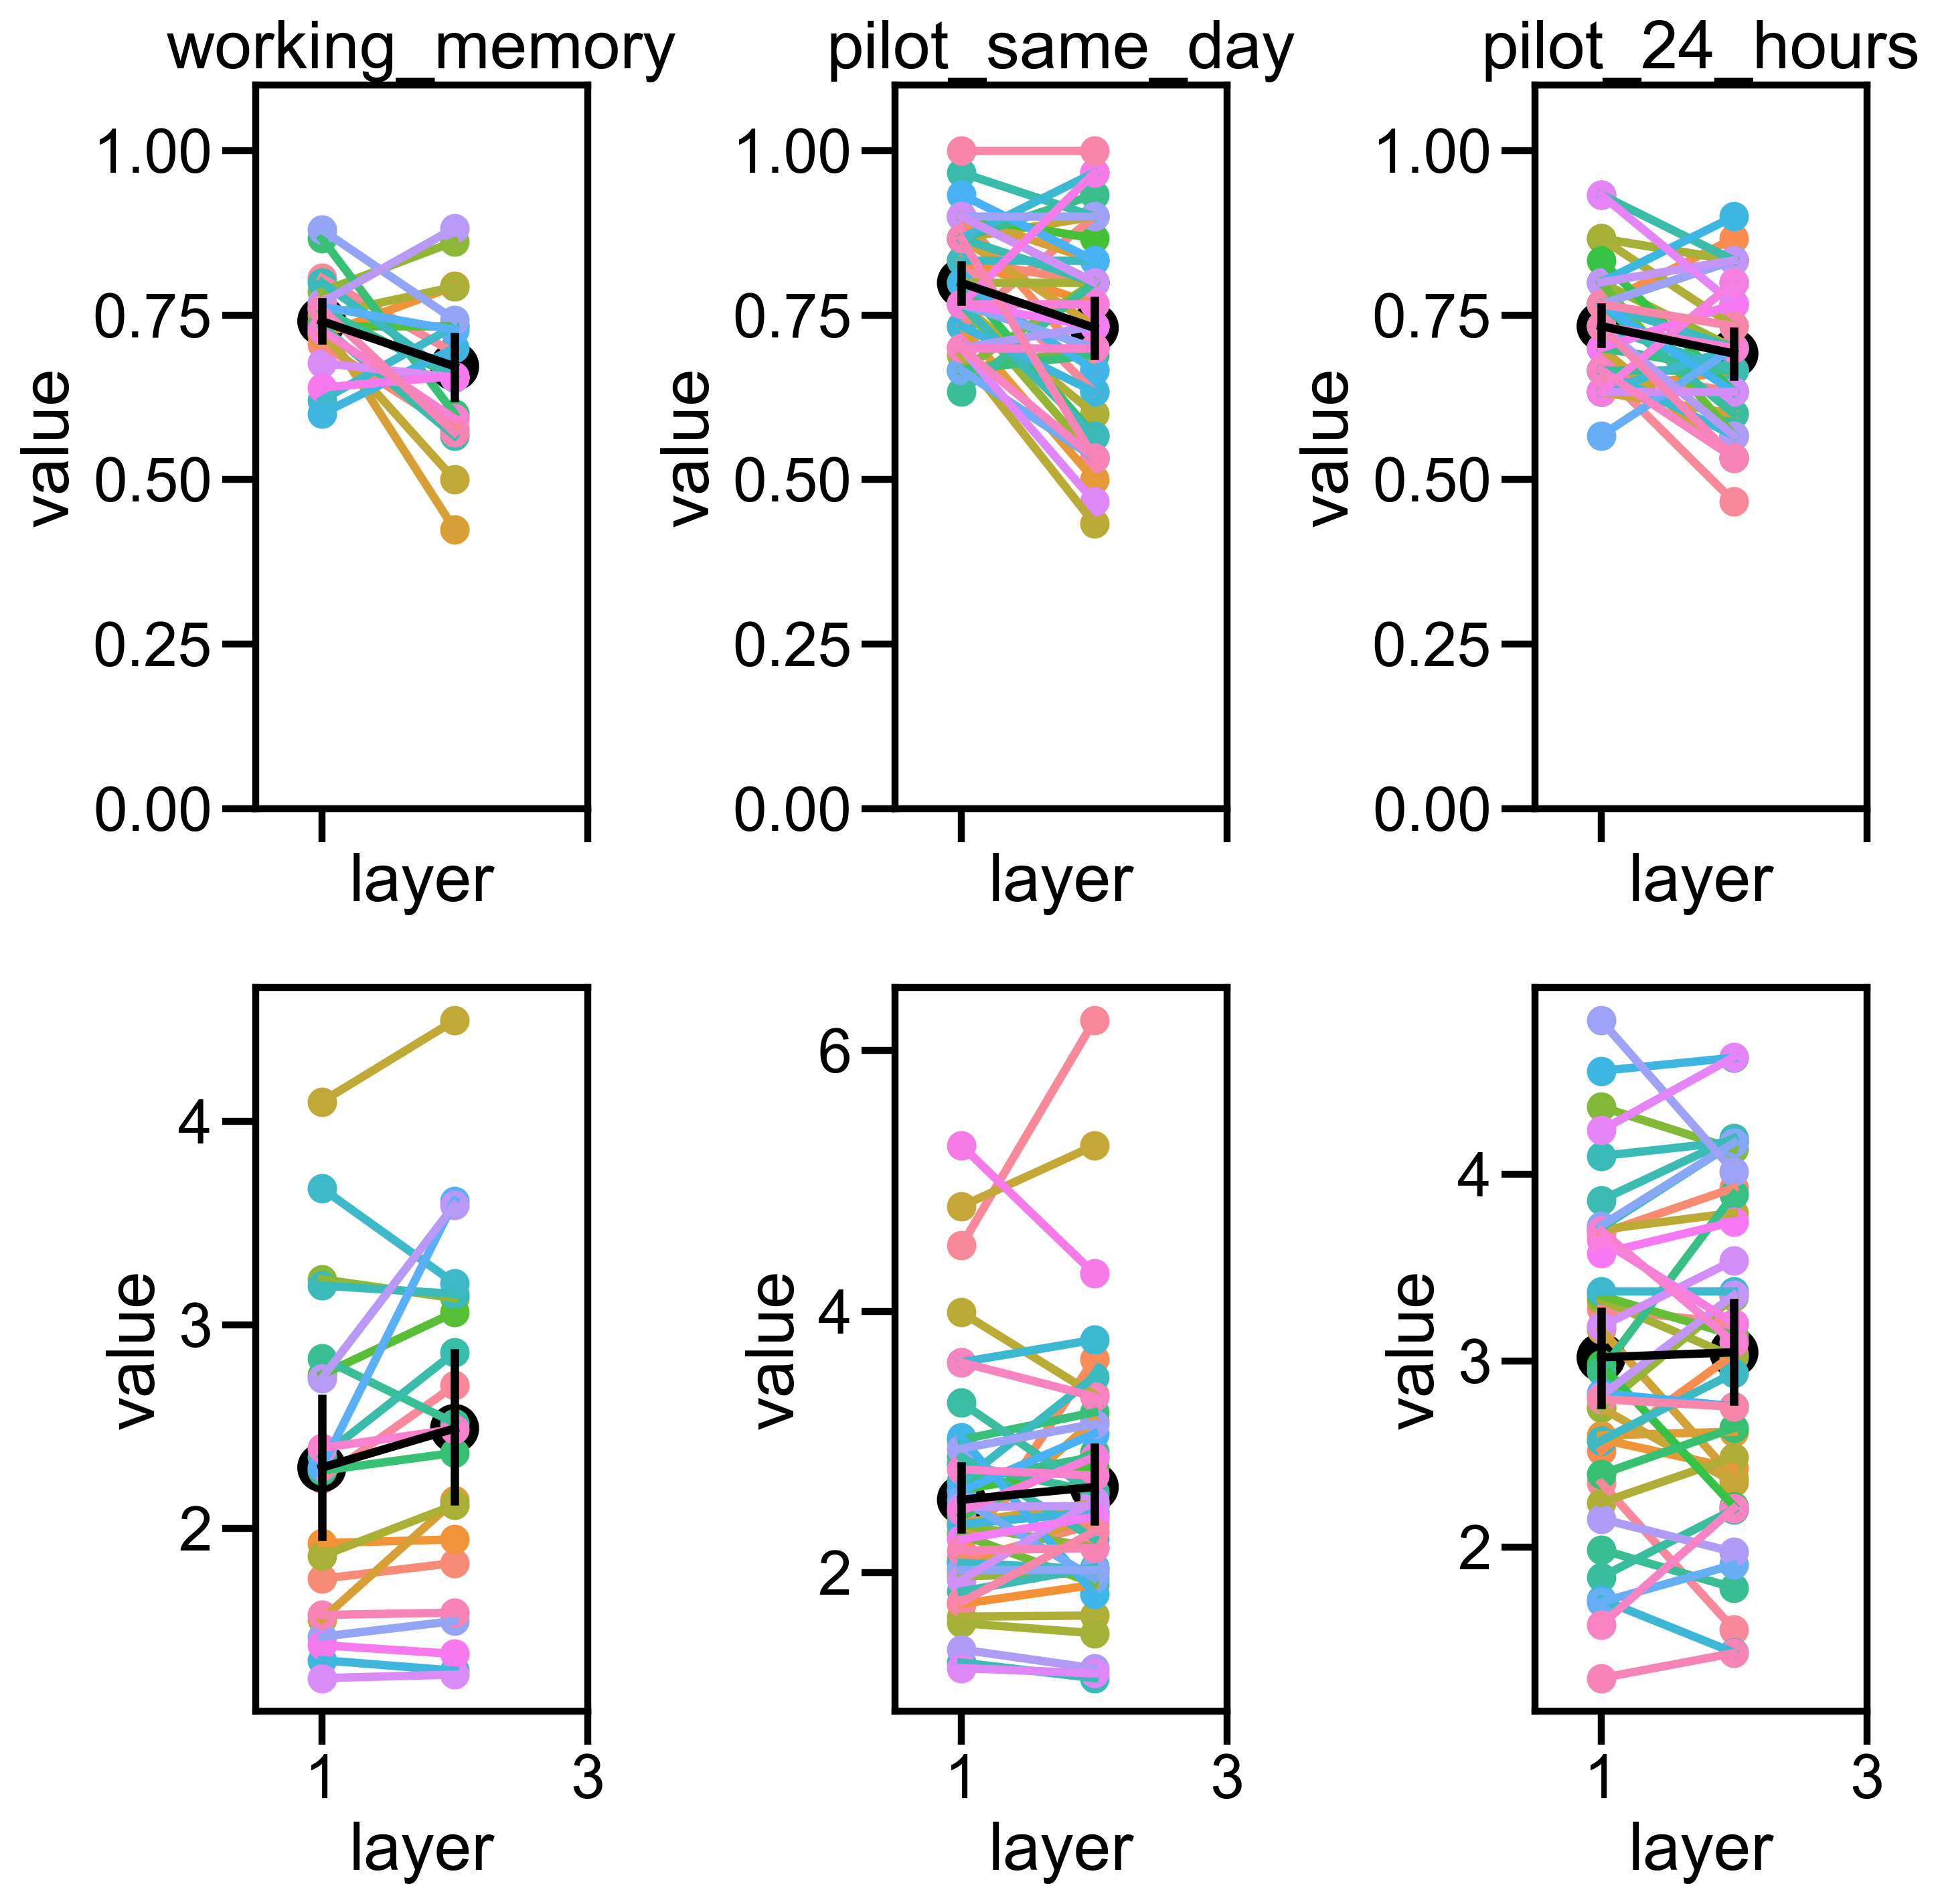

In [364]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10),sharex=True,sharey=False)
my_order = ['working_memory','pilot_same_day','pilot_24_hours']
for i,curtime in enumerate(my_order):
    #accuracy: 
    g=sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[0,i], scale = 0.6)
    plt.setp(axes[0,i].lines, zorder=100, linewidth=3)
    axes[0,i].set_ylim([0,1.1])
    sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value',ax=axes[0,i],color='black',scale=1)
    plt.setp(axes[0,i].lines, zorder=200, linewidth=3)
    axes[0,i].get_legend().remove() 
    axes[0,i].set_title(curtime)
    #rt: 
    g=sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[1,i], scale = 0.6)
    plt.setp(axes[1,i].lines, zorder=100, linewidth=3)
    sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value',ax=axes[1,i],color='black',scale=1)
    plt.setp(axes[1,i].lines, zorder=200, linewidth=3)
    plt.xticks([0,2],['1','3'])
    axes[1,i].get_legend().remove()

plt.tight_layout()
fig.savefig(PATH_TO_EXPERIMENT / ('line_graphs_per_condition_in_seperate_subplots_'+qualification_method+'.svg'))


In [365]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths if len(path.get_offsets()[:,0])>0]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths  if len(path.get_offsets()[:,1])>0]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets ]
  # Connect each pair of points from the same row with a line
  for i in range(len(x_offsets_arrays[0])):
    ax.plot([x_offsets_arrays[0][i], x_offsets_arrays[0+1][i]], [y_offsets_arrays[0][i], y_offsets_arrays[0+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  for i in range(len(x_offsets_arrays[2])):
    ax.plot([x_offsets_arrays[2][i], x_offsets_arrays[2+1][i]], [y_offsets_arrays[2][i], y_offsets_arrays[2+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  # this is an additions for when there are 3 bars to plot (3 time gaps) 3 bars with 2 subbars 
  if len(x_offsets_arrays) == 6:
    for i in range(len(x_offsets_arrays[4])):
      ax.plot([x_offsets_arrays[4][i], x_offsets_arrays[4+1][i]], [y_offsets_arrays[4][i], y_offsets_arrays[4+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

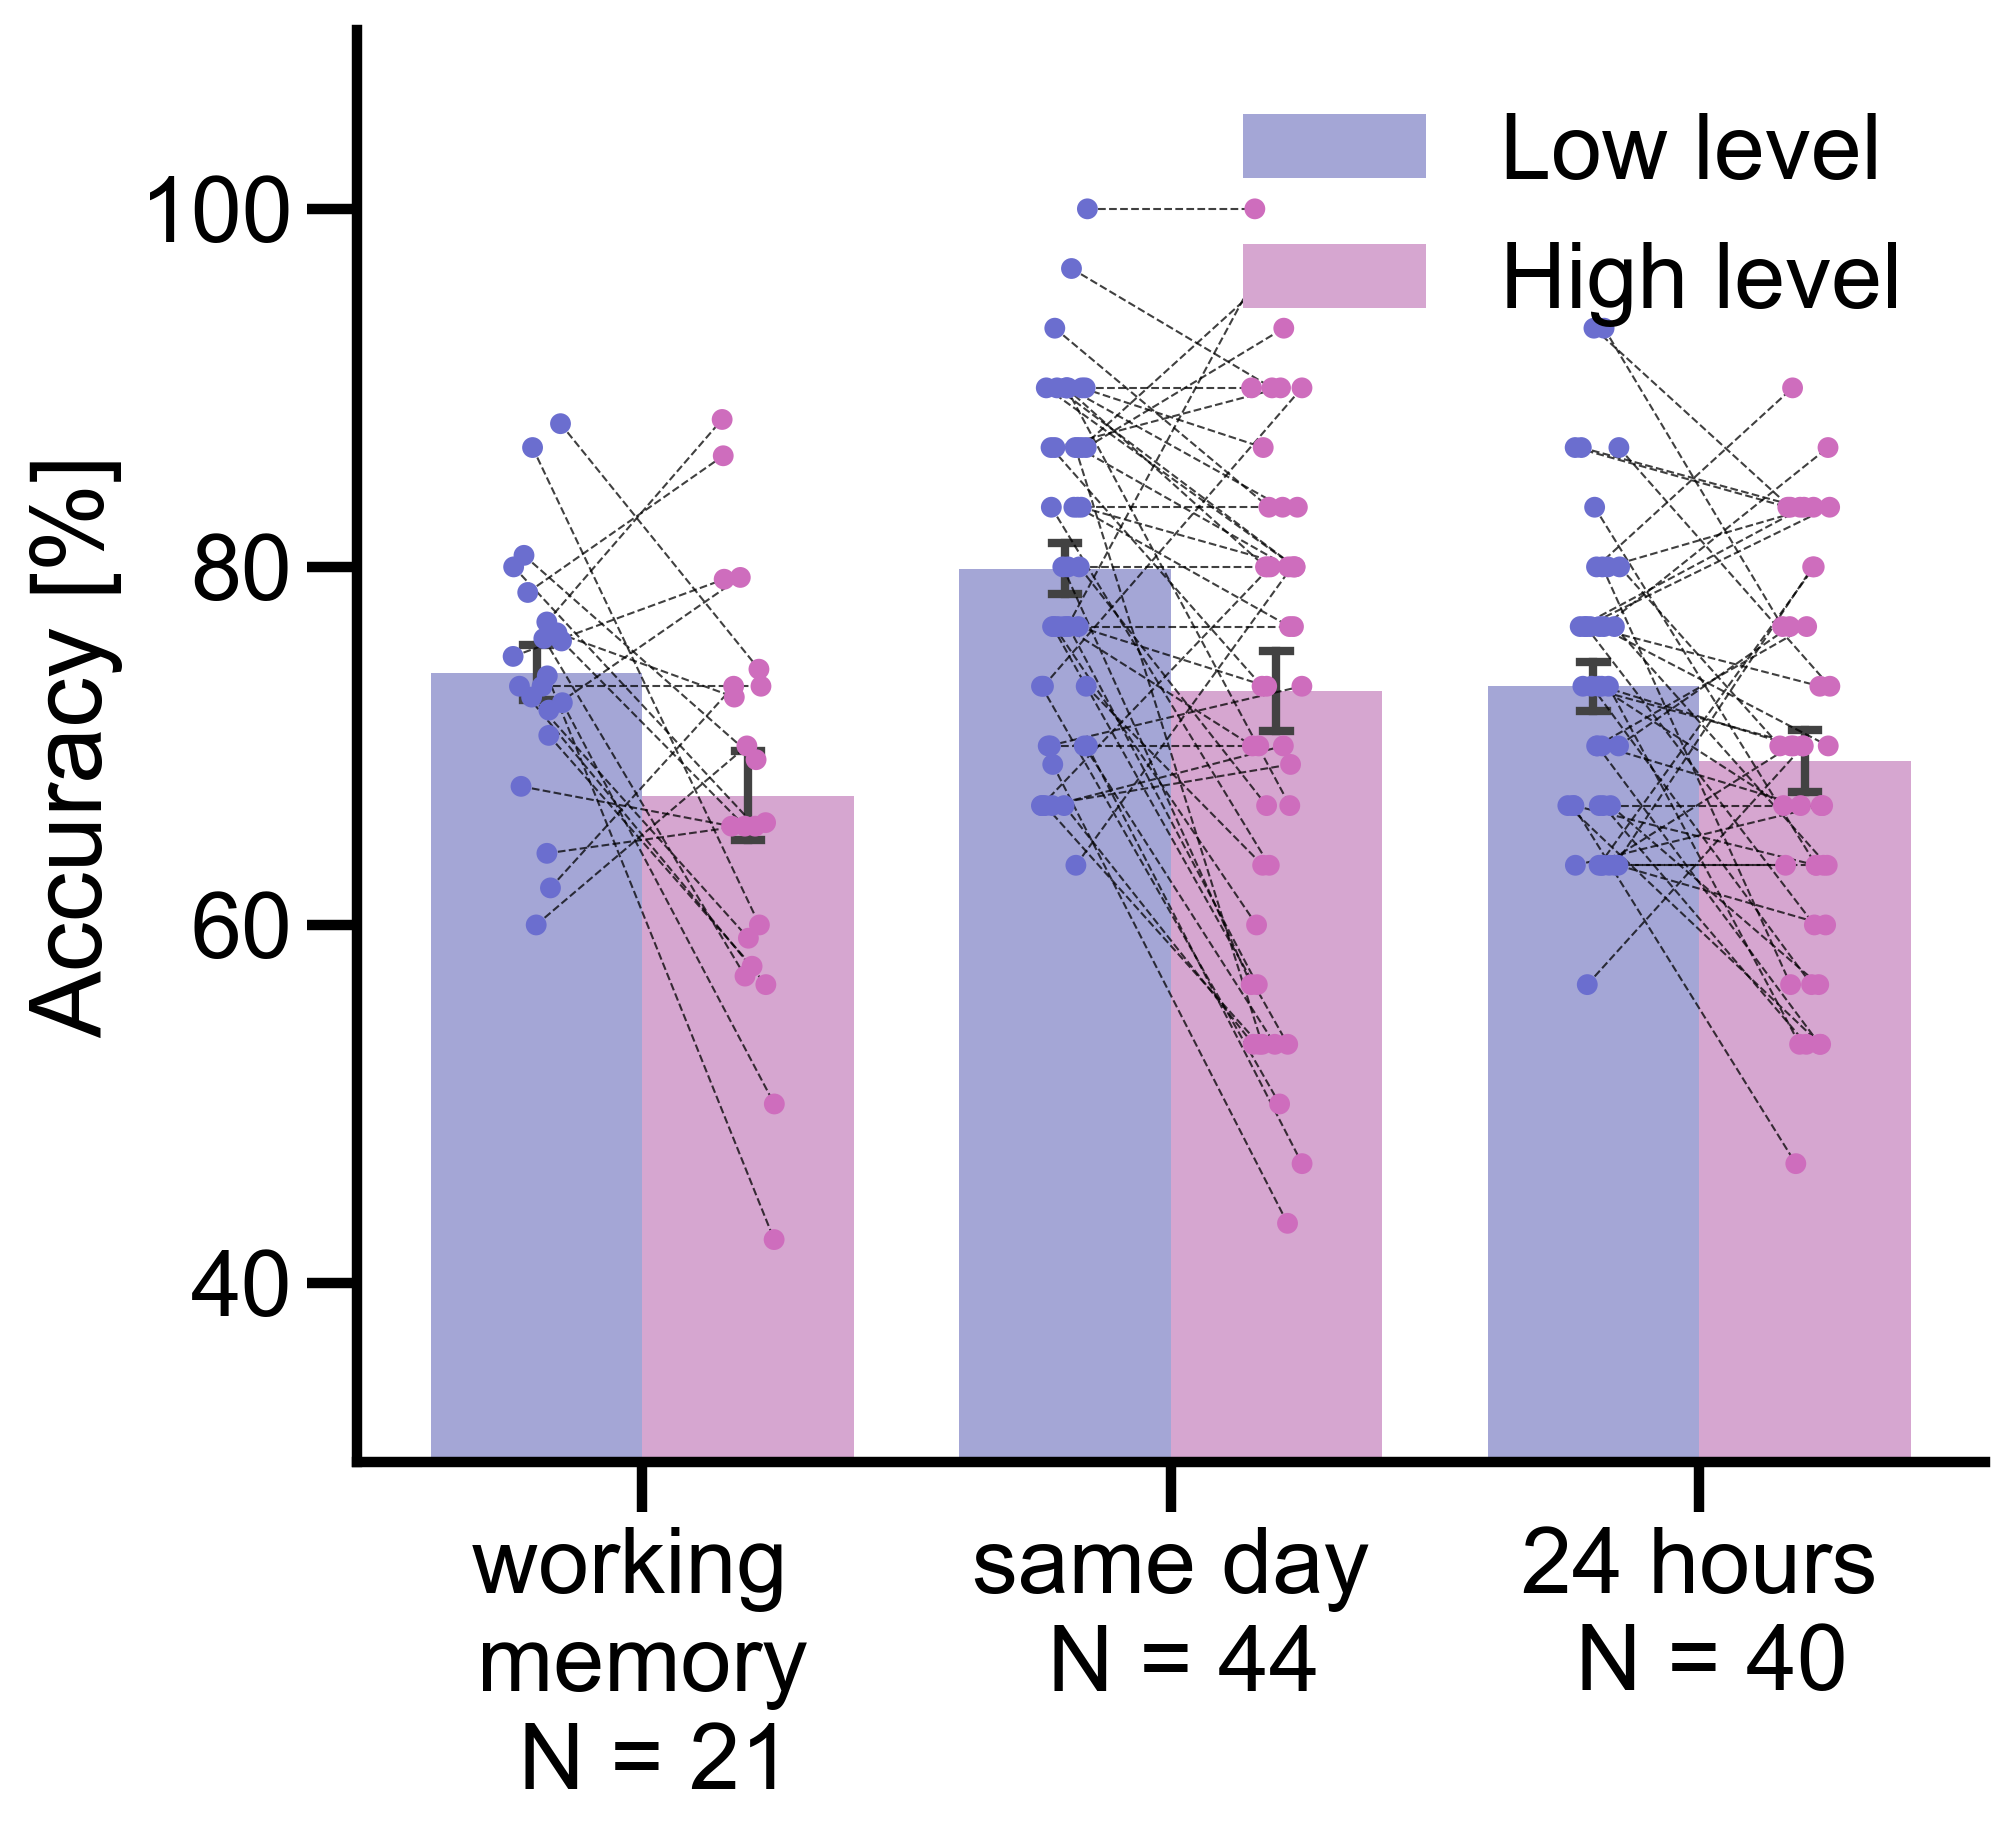

In [366]:
#code for figures:
my_order = ['low_level_accuracy','high_level_accuracy']

if accuracy_df['value'].mean()<1:
    accuracy_df['value']=accuracy_df['value']*100

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,6.2),gridspec_kw = {'wspace':0.2, 'hspace':0})

bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,palette=[sns.color_palette()[3],sns.color_palette()[-1]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'],errorbar='se', capsize=.05,errwidth=2)
stripplot=sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,dodge=True,palette=[sns.color_palette()[2],sns.color_palette()[-2]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'])

# Hide the right and top spines
axes.spines[['right', 'top']].set_visible(False)

# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes.set_xlabel('')
axes.set_xticklabels(labels=[f'working \nmemory\n N = {n_working_memory}',f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'])
# Rotating X-axis labels
#plt.xticks(rotation = -45)
handles, labels = axes.get_legend_handles_labels()
legend = axes.legend(handles[2:],['Low level','High level'],loc='upper right', facecolor='none', framealpha=0)
# create the legend and set its facecolor and alpha values

# set the alpha value of the legend text
for text in legend.get_texts():
    text.set_alpha(1)


add_connecting_lines_to_stripplot(stripplot,axes)
axes.set_ylabel('Accuracy [%]')
axes.set_ylim([30,110])
fig.patch.set_alpha(0)


fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.svg'))
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.pdf'), transparent=True)
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.png'), transparent=True)


In [367]:
all_directories_paths_long_term_memory = [path.Path(cur_path) for cur_path in all_directories_paths_long_term_memory]
all_directories_paths_working_memory = [path.Path(cur_path) for cur_path in all_directories_paths_working_memory]
all_participants_batch_locations = all_directories_paths_working_memory + all_directories_paths_long_term_memory

# long format long term memroy

In [368]:
#create a long format encoding and test dataframes: 
all_subjects_encoding_long_format_df_long_term=pd.DataFrame()
all_subjects_test_long_format_df_long_term=pd.DataFrame()
for cur_batch in all_directories_paths_long_term_memory:
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    all_subjects_encoding_long_format_df_long_term=pd.concat([all_subjects_encoding_long_format_df_long_term,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df_long_term=pd.concat([all_subjects_test_long_format_df_long_term,cur_sub_test_df],axis=0)


all_valid_test_df_long_format_long_term=pd.DataFrame()
all_valid_encoding_df_long_format_ling_term=pd.DataFrame()

for cur_sub in all_valid_subjects_non_working_memory.index:
    #some subject names are the full length name to thier csv: if this is the case, change it to take only the amazong worker id: 
    cur_sub_encoding=all_subjects_encoding_long_format_df_long_term[all_subjects_encoding_long_format_df_long_term['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df_long_term[all_subjects_test_long_format_df_long_term['subject']==cur_sub]
    all_valid_encoding_df_long_format_ling_term=pd.concat([all_valid_encoding_df_long_format_ling_term,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format_long_term=pd.concat([all_valid_test_df_long_format_long_term,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_long_term['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_long_term['time_gap'].value_counts())


only valid participants counts:
time_gap
pilot_same_day    2640
pilot_24_hours    2520
Name: count, dtype: int64
all participants counts:
time_gap
pilot_same_day    5280
pilot_24_hours    4800
Name: count, dtype: int64


# long format working memroy 

In [369]:
#create a long format encoding and test dataframes: 
all_subjects_test_long_format_df_working_memory=pd.DataFrame()
for cur_batch in all_directories_paths_working_memory:
    
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_rating_and_accuracy_df.csv')
    cur_sub_test_df['time_gap']='working_memory'
    all_subjects_test_long_format_df_working_memory=pd.concat([all_subjects_test_long_format_df_working_memory,cur_sub_test_df],axis=0)


all_valid_test_df_long_format_working_memory=pd.DataFrame()

for cur_sub in all_valid_subjects_working_memory.index:

    cur_sub_test=all_subjects_test_long_format_df_working_memory[all_subjects_test_long_format_df_working_memory['subject']==cur_sub]
    all_valid_test_df_long_format_working_memory=pd.concat([all_valid_test_df_long_format_working_memory,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_working_memory['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_working_memory['time_gap'].value_counts())


only valid participants counts:
time_gap
working_memory    1260
Name: count, dtype: int64
all participants counts:
time_gap
working_memory    3960
Name: count, dtype: int64


In [370]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct'] == all_subjects_test_long_format_df_working_memory['test_key_resp.keys'] 

In [371]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct_numeric'].apply(lambda x: int(x))

## add the selected dist columns 

In [387]:
vals = all_subjects_test_long_format_df_long_term['correct'].map({'left': 1,'right':0})
selected_dist = all_subjects_test_long_format_df_long_term[['image1','image2']].values[:,vals.values]
selected_dist.shape

(10080, 10080)

In [372]:
new_cols = {'bar_2.response':'slider_part2.response',
            'layer':'distractor_level',
            'test_test_response.keys':'test_key_resp.keys',
            
            'test_test_response.rt':'test_key_resp.rt',
            'test_test_response.corr': 'correct_numeric',
            
}

all_subjects_test_long_format_df_long_term.rename(columns=new_cols,inplace=True)

In [373]:
all_subjects_test_long_format_df_long_term.columns

Index(['Unnamed: 0', 'distractor_level', 'correct', 'test_key_resp.keys',
       'correct_numeric', 'test_key_resp.rt', 'trials_2.thisRepN',
       'trials_2.thisTrialN', 'trials_2.thisN', 'trials_2.thisIndex',
       'trials_2.ran', 'image1', 'image2', 'slider_part2.response', 'subject',
       'time_gap'],
      dtype='object')

In [374]:
all_subjects_test_long_format_df_working_memory.columns

Index(['Unnamed: 0', 'workID', 'Age', 'Gender', 'target', 'image1', 'image2',
       'correct', 'background_0', 'background_1', 'background_2',
       'background_3', 'background_4', 'background_5', 'target_index',
       'test_key_resp.keys', 'test_key_resp.rt', 'distractor_level',
       'category', 'selected_dist', 'slider_part2.response', 'slider_part2.rt',
       'subject', 'time_gap', 'correct_numeric'],
      dtype='object')

In [378]:
df = pd.concat([all_subjects_test_long_format_df_long_term,all_subjects_test_long_format_df_working_memory])
df

,Unnamed: 0,distractor_level,correct,test_key_resp.keys,correct_numeric,test_key_resp.rt,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,...,background_0,background_1,background_2,background_3,background_4,background_5,target_index,category,selected_dist,slider_part2.rt
0,0,1.0,right,right,1.0,5.9214,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,left,left,1.0,3.3594,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,left,left,1.0,7.6472,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.0,right,right,1.0,3.5539,0.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,right,left,0.0,5.7232,0.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1075,1.0,right,left,0.0,1.0822,NaN,NaN,NaN,NaN,...,playground_47.jpg,mountain_302.jpg,golf_course_217.jpg,highway_295.jpg,bridge_254.jpg,badlands_85.jpg,2.0,golf,golf_course_262.jpg,3.1432
1076,1076,1.0,left,left,1.0,0.5433,NaN,NaN,NaN,NaN,...,badlands_125.jpg,bridge_238.jpg,mountain_294.jpg,golf_course_214.jpg,highway_313.jpg,playground_61.jpg,3.0,golf,golf_course_317.jpg,1.6247
1077,1077,0.0,left,left,1.0,0.2390,NaN,NaN,NaN,NaN,...,mountain_62.jpg,badlands_23.jpg,golf_course_116.jpg,highway_319.jpg,playground_227.jpg,bridge_22.jpg,1.0,badlands,badlands_114.jpg,2.5428
1078,1078,1.0,right,left,0.0,0.0839,NaN,NaN,NaN,NaN,...,mountain_169.jpg,highway_101.jpg,golf_course_3.jpg,badlands_219.jpg,bridge_128.jpg,playground_165.jpg,4.0,bridge,bridge_244.jpg,2.2783
